In [145]:
import pandas as pd
del _142
alldfs = [var for var in dir() if isinstance(eval(var), pd.core.frame.DataFrame)]
print(alldfs)

['Original_pandas']


In [2]:
import pyspark
import os
os.getcwd()
import findspark
findspark.init('/Users/priyankapatil/anaconda3/lib/python3.7/site-packages/pyspark')
print ("Hey Priyanka")
from pyspark.sql import Row
from pyspark.sql import functions
from pyspark.sql import SQLContext
from pyspark import SparkContext, SparkConf
from pyspark.sql.types import *
from pyspark.sql.functions import *
import pyspark.sql.functions as func
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np


spark = SparkSession.builder.config("spark.sql.warehouse.dir", "file:///C:/temp").appName("SparkSQL").getOrCreate()

sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]").set('spark.executor.memory', '4G').set('spark.driver.memory', '45G'))
sqlContext = SQLContext(sc)
sc

Hey Priyanka


<SparkContext master=local[*] appName=SparkSQL>

In [146]:
#dfspark = pd.read_csv(r'/Users/priyankapatil/Desktop/Data/Dec.csv',sep=',')
#df.set_option('display.max_columns', None)
df_atl = pd.read_csv(r'/Users/priyankapatil/Desktop/Data/dataset_flight.csv',sep=',')


/Users/priyankapatil/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (0,1,2,3,4,7,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [147]:
#dfspark.drop(["DEP_TIME","ARR_TIME","TAIL_NUM","TAXI_OUT","TAXI_IN","YEAR", "QUARTER","DAY_OF_MONTH","AIR_TIME","OP_UNIQUE_CARRIER"], axis=1, inplace=True)
df_atl.drop(["DEP_TIME","ARR_TIME","TAIL_NUM","TAXI_OUT","TAXI_IN","YEAR", "QUARTER","DAY_OF_MONTH","AIR_TIME","OP_UNIQUE_CARRIER"], axis=1, inplace=True)


In [149]:
#df_atl=df_atl.query("ORIGIN == 'ATL'")
df_atl.shape

(781668, 21)

In [151]:
#int_cols = ['MONTH','DAY_OF_WEEK','OP_CARRIER_FL_NUM','CRS_DEP_TIME','DEP_DELAY','CRS_ARR_TIME']
#df_atl[int_cols] = df_atl[int_cols].apply(pd.to_numeric, downcast='float', errors='coerce')
int_cols = ['CANCELLED','DIVERTED','CRS_ELAPSED_TIME','ARR_DELAY']
df_atl[int_cols] = df_atl[int_cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [152]:
int_cols = ['ACTUAL_ELAPSED_TIME','DISTANCE','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']
df_atl[int_cols] = df_atl[int_cols].apply(pd.to_numeric, downcast='float', errors='coerce')


In [109]:
#test=dfspark
#t=test.groupby("ORIGIN").count()
#t.sort_values("DAY_OF_WEEK", ascending=False,inplace=True)
#t.head(10)
dfspark.shape

(593842, 21)

In [153]:
df_atl['DEP_DEL15'] = np.where((df_atl['DEP_DELAY'] > 15),1,0)
#dfspark['Traffic'] = np.where((dfspark['ORIGIN'] == 'ATL') | (dfspark['ORIGIN'] == 'ORD'),10,0)



In [154]:
int_cols = ['DEP_DEL15']
df_atl[int_cols] = df_atl[int_cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [142]:
dfspark.head(5)

,MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DEP_DEL15,clusters
0,12.0,4.0,867.0,SYR,ATL,1747.0,-1.0,2030.0,-8.0,0.0,NaN,0.0,163.0,156.0,794.0,NaN,NaN,NaN,NaN,NaN,0.0,3
1,12.0,4.0,868.0,ATL,FLL,1200.0,0.0,1356.0,12.0,0.0,NaN,0.0,116.0,128.0,581.0,NaN,NaN,NaN,NaN,NaN,0.0,0
2,12.0,4.0,868.0,FLL,ATL,1440.0,16.0,1639.0,19.0,0.0,NaN,0.0,119.0,122.0,581.0,0.0,0.0,7.0,0.0,12.0,1.0,1
3,12.0,4.0,869.0,SAN,SEA,1851.0,-5.0,2154.0,11.0,0.0,NaN,0.0,183.0,199.0,1050.0,NaN,NaN,NaN,NaN,NaN,0.0,3
4,12.0,4.0,869.0,SEA,SAN,1519.0,0.0,1806.0,-38.0,0.0,NaN,0.0,167.0,129.0,1050.0,NaN,NaN,NaN,NaN,NaN,0.0,0


In [36]:
dfspark['CRS_DEP_TIME'] = dfspark['CRS_DEP_TIME'].div(300)
dfspark['CRS_ARR_TIME'] = dfspark['CRS_ARR_TIME'].div(300)
dfspark['CRS_ELAPSED_TIME'] = dfspark['CRS_ELAPSED_TIME'].div(300)
#df_flown.head(100)

In [163]:
og_atl_pandas.head(10)

,MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DEP_DEL15
137,4.0,2.0,1900.0,ATL,SFO,732.0,-4.0,947.0,4.0,0.0,NaN,0.0,315.0,323.0,2139.0,NaN,NaN,NaN,NaN,NaN,0.0
558,4.0,2.0,1194.0,ATL,IAD,1437.0,-1.0,1622.0,10.0,0.0,NaN,0.0,105.0,116.0,534.0,NaN,NaN,NaN,NaN,NaN,0.0
624,4.0,2.0,1112.0,ATL,EWR,1142.0,1.0,1401.0,-8.0,0.0,NaN,0.0,139.0,130.0,746.0,NaN,NaN,NaN,NaN,NaN,0.0
675,4.0,2.0,1018.0,ATL,EWR,930.0,-9.0,1148.0,-15.0,0.0,NaN,0.0,138.0,132.0,746.0,NaN,NaN,NaN,NaN,NaN,0.0
712,4.0,2.0,912.0,ATL,SFO,1908.0,-1.0,2130.0,-9.0,0.0,NaN,0.0,322.0,314.0,2139.0,NaN,NaN,NaN,NaN,NaN,0.0
761,4.0,2.0,792.0,ATL,EWR,1544.0,-6.0,1800.0,-9.0,0.0,NaN,0.0,136.0,133.0,746.0,NaN,NaN,NaN,NaN,NaN,0.0
780,4.0,2.0,778.0,ATL,IAD,953.0,-7.0,1138.0,-5.0,0.0,NaN,0.0,105.0,107.0,534.0,NaN,NaN,NaN,NaN,NaN,0.0
905,4.0,2.0,674.0,ATL,EWR,1931.0,4.0,2147.0,4.0,0.0,NaN,0.0,136.0,136.0,746.0,NaN,NaN,NaN,NaN,NaN,0.0
1049,4.0,2.0,533.0,ATL,DEN,835.0,-7.0,948.0,1.0,0.0,NaN,0.0,193.0,201.0,1199.0,NaN,NaN,NaN,NaN,NaN,0.0
1175,4.0,2.0,421.0,ATL,EWR,1036.0,NaN,1255.0,NaN,1.0,A,0.0,139.0,NaN,746.0,NaN,NaN,NaN,NaN,NaN,0.0


In [155]:
#dfspark=dfspark.loc[:, ~dfspark.columns.str.contains('^Unnamed')]
#Original_pandas=dfspark
df_atl=df_atl.loc[:, ~df_atl.columns.str.contains('^Unnamed')]
og_atl_pandas=df_atl


In [156]:
#Create Schema to convert to Spark dataframe
schema = StructType([StructField("Month", StringType(), True)\
                       ,StructField("DAY_OF_WEEK", FloatType(), True)\
                       ,StructField("FlightNo", FloatType(), True)\
                       ,StructField("Origin", StringType(), True)\
                       ,StructField("Dest", StringType(), True)\
                       ,StructField("SchDep", FloatType(), True)\
                       ,StructField("DepDelay", FloatType(), True)\
                       ,StructField("SchArr", FloatType(), True)\
                       ,StructField("ArrDelay", FloatType(), True)\
                       ,StructField("Cancelled", FloatType(), True)\
                       ,StructField("Cancelcode", StringType(), True)\
                       ,StructField("Diverted", FloatType(), True)\
                       ,StructField("SchElapsedTime", FloatType(), True)\
                       ,StructField("ElapsedTime", FloatType(), True)\
                       ,StructField("Distance", FloatType(), True)\
                       ,StructField("CarrierDelay", FloatType(), True)\
                       ,StructField("WeatherDelay", FloatType(), True)\
                       ,StructField("NASDelay", FloatType(), True)\
                       ,StructField("SecurityDelay", FloatType(), True)\
                       ,StructField("LateAircraftDelay", FloatType(), True)\
                       ,StructField("DepDelay15", FloatType(), True)])

In [157]:
dataspark = spark.createDataFrame(og_atl_pandas, schema=schema)
dataspark.show(5)


+-----+-----------+--------+------+----+------+--------+------+--------+---------+----------+--------+--------------+-----------+--------+------------+------------+--------+-------------+-----------------+----------+
|Month|DAY_OF_WEEK|FlightNo|Origin|Dest|SchDep|DepDelay|SchArr|ArrDelay|Cancelled|Cancelcode|Diverted|SchElapsedTime|ElapsedTime|Distance|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|DepDelay15|
+-----+-----------+--------+------+----+------+--------+------+--------+---------+----------+--------+--------------+-----------+--------+------------+------------+--------+-------------+-----------------+----------+
|  4.0|        2.0|  1900.0|   ATL| SFO| 732.0|    -4.0| 947.0|     4.0|      0.0|       NaN|     0.0|         315.0|      323.0|  2139.0|         NaN|         NaN|     NaN|          NaN|              NaN|       0.0|
|  4.0|        2.0|  1194.0|   ATL| IAD|1437.0|    -1.0|1622.0|    10.0|      0.0|       NaN|     0.0|         105.0|      116.0|   

In [158]:
from pyspark.mllib.linalg import Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from pyspark import SparkContext
# from sklearn.cluster import KMeans
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col
# 'DAY_OF_WEEK', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'DISTANCE', 'DEP_DEL15'

dataset= dataspark.rdd.map(lambda x:(Vectors.dense([float(x[1]),float(x[5]),float(x[7]),float(x[8]),float(x[14])]),x[20]))
dataset= sqlContext.createDataFrame(dataset,["features","label"])
dataset.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[2.0,732.0,947.0,...|  0.0|
|[2.0,1437.0,1622....|  0.0|
|[2.0,1142.0,1401....|  0.0|
|[2.0,930.0,1148.0...|  0.0|
|[2.0,1908.0,2130....|  0.0|
|[2.0,1544.0,1800....|  0.0|
|[2.0,953.0,1138.0...|  0.0|
|[2.0,1931.0,2147....|  0.0|
|[2.0,835.0,948.0,...|  0.0|
|[2.0,1036.0,1255....|  0.0|
|[2.0,1758.0,2013....|  1.0|
|[2.0,1850.0,2013....|  0.0|
|[2.0,1050.0,1157....|  1.0|
|[2.0,600.0,806.0,...|  0.0|
|[2.0,1737.0,1900....|  0.0|
|[1.0,732.0,947.0,...|  0.0|
|[1.0,2010.0,2135....|  0.0|
|[1.0,1437.0,1622....|  0.0|
|[1.0,1142.0,1401....|  0.0|
|[1.0,930.0,1148.0...|  0.0|
+--------------------+-----+
only showing top 20 rows



In [159]:
from pyspark.ml.clustering import KMeans

# Trains a k-means model.
kmeans = KMeans().setK(4).setSeed(1)
model = kmeans.fit(dataset)

IllegalArgumentException: 'requirement failed'

In [122]:
# Make predictions
predictions = model.transform(dataset)

In [123]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.5108290628716742


In [124]:
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[   4.02177571 1281.73566522 1446.12567801  442.9300866 ]
[   4.12264444 1888.39185883 2064.05722637  507.09155931]
[   4.06077654 1121.50756627 1589.56938998 2175.55945219]
[  4.01934905 750.09375785 958.78094718 665.52035322]
[   4.11268967 1500.38653569 1814.61327752 1194.71237543]
[   4.24724409 2173.79156355  269.78818898 1559.86839145]


In [164]:
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

#Standardize columns for predictions
clmns = ['DAY_OF_WEEK', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'ARR_DELAY','DISTANCE','DEP_DEL15']
df_tr_std = stats.zscore(og_atl_pandas[clmns])
print(df_tr_std)



#Cluster the data
#cost=[]
#for i in range(1, 11):
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_tr_std)
labels = kmeans.labels_
#    cost.append(kmeans.inertia_) 
    
# plot the cost against K values 
#plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
#plt.xlabel("Value of K") 
#plt.ylabel("Sqaured Error (Cost)") 
#plt.show() # clear the plot 
  


#Glue back to originaal data
og_atl_pandas['clusters'] = labels

#Add the column into our list
clmns.extend(['clusters'])

[[-0.9579079  -1.5445881  -1.1919197          nan  3.1732886  -0.44930866]
 [-0.9579079  -0.06657013  0.1216187          nan -0.24137896 -0.44930866]
 [-0.9579079  -0.68503153 -0.30844352         nan  0.20965499 -0.44930866]
 ...
 [-0.9579079  -0.29089344 -0.20336044         nan -0.5137014  -0.44930866]
 [-0.9579079   0.71541667  0.7501711          nan -0.5137014  -0.44930866]
 [-0.9579079  -1.6116754  -1.4390595          nan -0.5137014  -0.44930866]]


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [126]:
#from sklearn.cluster import KMeans

#Cluster the data
#for i in range(1, 11):
#kmeans = KMeans(n_clusters=6, random_state=0).fit(df_tr_std)
#labels = kmeans.labels_

#Glue back to originaal data
#Original_pandas['clusters'] = labels

#Add the column into our list
#clmns.extend(['clusters'])

In [127]:
#Lets analyze the clusters
print(Original_pandas[clmns].groupby(['clusters']).mean())

          DAY_OF_WEEK  CRS_DEP_TIME  CRS_ARR_TIME     DISTANCE  DEP_DEL15
clusters                                                                 
0            4.059564   1335.521973   1481.588745  2163.999023   0.075031
1            2.404036   1721.037476   1922.081787   631.200256   0.000000
2            1.902354    924.836182   1075.284912   648.962219   0.007912
3            5.582300    914.990417   1060.339966   653.316162   0.003198
4            4.369355   1498.994629   1637.042358   744.737793   1.000000
5            6.155208   1712.749756   1917.151978   651.222839   0.000000


(0, 2499.7291297105835)

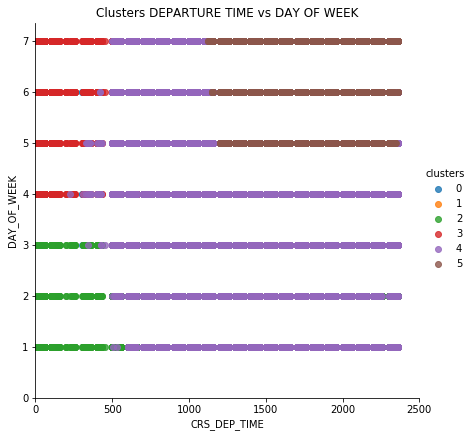

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

#Scatter plot of Departure delay and Arrival Delay leaving from Tampa airport
sns.lmplot('CRS_DEP_TIME', 'DAY_OF_WEEK', 
           data=Original_pandas, 
           fit_reg=False, 
           hue='clusters', height = 6)
plt.title('Clusters DEPARTURE TIME vs DAY OF WEEK')
plt.xlabel('CRS_DEP_TIME')
plt.ylabel('DAY_OF_WEEK')

plt.ylim(0, None)
plt.xlim(0, None)